In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 장기간 예측 성능 평가해보려함
데이터분석의 경우 1step에서 진행

# Data

In [5]:
df = sns.load_dataset('flights')
df['year'] = df['year'].astype('str')
df['month'] = pd.factorize(df['month'])[0]+1
df['month'] = df['month'].astype('str')
df['date'] = df['year']+'-'+df['month']
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df[['passengers']]
df.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Visualization

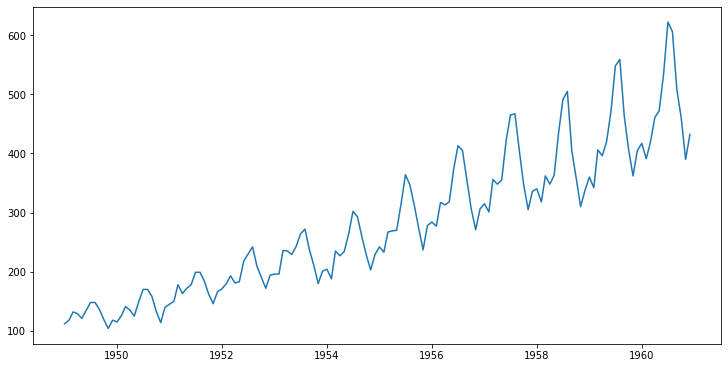

In [6]:
fig,ax = plt.subplots(figsize=(10,5),constrained_layout=True)
ax.plot(df.index, df['passengers'])

In [7]:
df['log_passengers'] = np.log(df['passengers'])

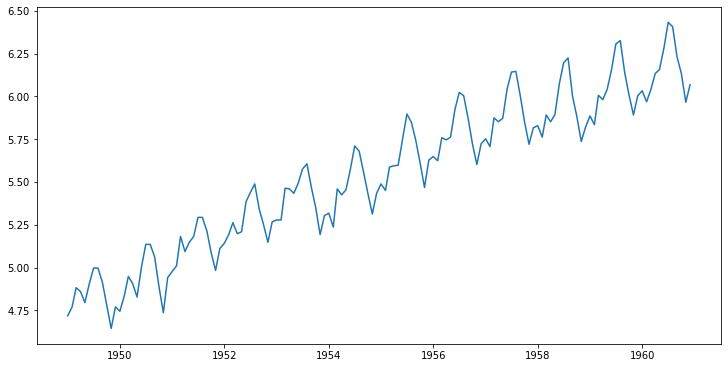

In [9]:
fig,ax = plt.subplots(figsize=(10,5),constrained_layout=True)
ax.plot(df.index, df['log_passengers'])

# 2년 예측: Recursive

In [11]:
df_ = df[['log_passengers']]
df_.head()

,log_passengers
date,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


## pipeline
데이터 수가 적기 때문에 window_feature은 고려하지 않을 예정

In [ ]:
from sklearn.pipeline import Pipeline
from feature_engine.timeseries.forecasting import LagFeatures
from f